In [2]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = mpimg.imread('dinosaur.png')
print('Image dimensions:', img.shape)

Image dimensions: (1024, 1024, 4)


In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.59, 0.11])

gray = rgb2gray(img)

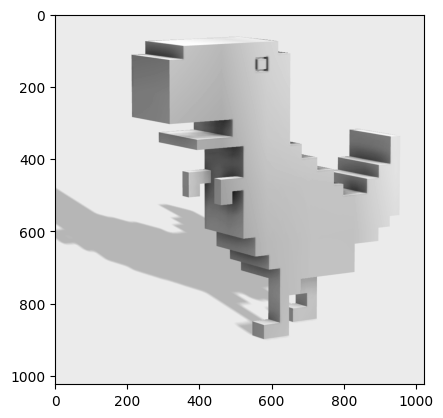

In [5]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
gray.shape

(1024, 1024)

In [51]:
def nablaG(G,x,y,h=1):
    delx = (G[x+h,y]-G[x-h,y])/(2*h)
    dely = (G[x,y+h]-G[x,y-h])/(2*h)
    return (delx, dely)

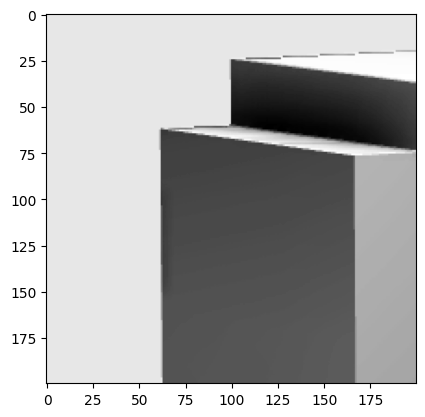

In [15]:
nose = gray[50:250, 150:350]
plt.imshow(nose, cmap=plt.get_cmap('gray'))

In [44]:
img = gray
n = img.shape
gradG = np.zeros((img.shape[0], img.shape[1]), dtype=float)
for x in range(1, img.shape[0]-1):
    for y in range(1, img.shape[1]-1):
        g = nablaG(img, x, y)
        gradG[x, y] = np.sqrt(g[0]**2+g[1]**2)

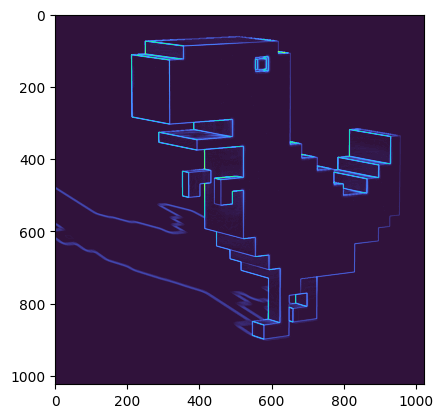

In [50]:
plt.imshow(gradG, cmap=plt.get_cmap('turbo'))